# Half correlation heatmap

This produces Figure 6D in Li et al. (2017) Metabolic Phenotypes of Response to Vaccination in Humans. Cell 169(5): p862-877 (https://www.cell.com/cell/fulltext/S0092-8674(17)30477-4).

Objective: correlation heatmap of several gene modules, upper half only

Environment: Python 2.x

Technical level: beginner

In [2]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_table('../input_data/data_Fig6D.txt', header=0, index_col=0)
# need corr btw gene modules
data = data.T
data

Fig_6D_moduleactivity,D7/0_enriched for promoter motif NATCACGTGAY (putative SREBF1 targets) (M178),"D7/0_T & B cell development, activation (M62.0)",D7/0_B cell development/activation (M58),D7/0_double positive thymocytes (M126),D7/0_enriched in naive and memory B cells (M83),D7/0_G protein mediated calcium signaling (M159),D7/0_inositol phosphate metabolism (M129),D7/0_glycerophospholipid metabolism (M114.1)
ZV143,-0.311,-0.150,-0.266,-0.120,-0.211,-0.391,-0.514,-0.339
ZV203,0.068,0.136,0.167,0.375,0.243,-0.050,0.379,-0.018
ZV108,-0.062,0.041,0.183,-0.007,-0.002,0.173,0.012,0.060
ZV109,-0.419,-0.152,0.292,-0.012,-0.048,0.103,0.062,-0.324
ZV205,-0.351,-0.168,-0.461,-0.389,-0.389,-0.103,-0.486,-0.486
ZV136,-0.017,-0.009,-0.138,0.002,-0.178,0.037,-0.026,-0.175
ZV232,-0.015,-0.067,-0.091,0.032,0.005,-0.110,0.041,0.145
ZV233,-0.237,-0.053,-0.255,-0.201,-0.145,-0.494,-0.158,-0.014
ZV230,0.025,-0.083,0.073,-0.087,-0.031,-0.160,0.159,0.372
ZV231,0.187,0.053,0.091,0.205,0.257,0.035,0.037,0.129


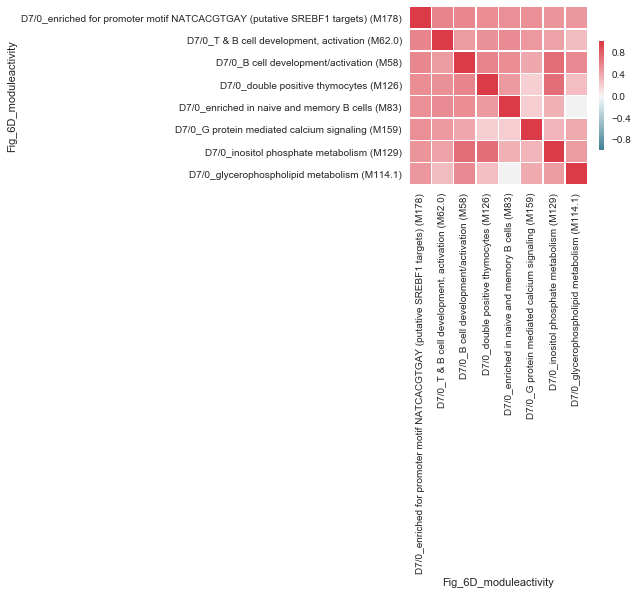

In [4]:
# Full heatmap of correlation coefficients
# default is Pearson correlation
full_corr = data.corr()
#full_corr

f, ax = plt.subplots(figsize=(4,4))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(full_corr, cmap=cmap, square=True, 
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.show()

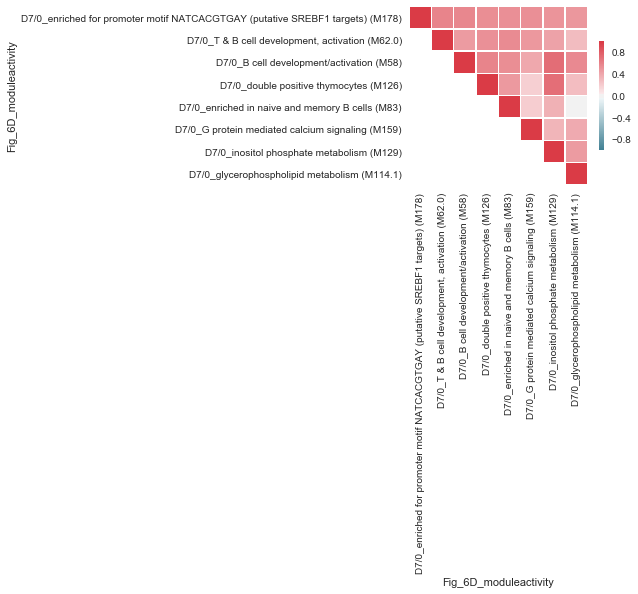

In [12]:
# Do half heatmap of correlation coefficients using a mask matrix
mask = np.zeros_like(full_corr.values, dtype=np.bool)
mask[np.tril_indices_from(mask)] = True

# add diagonal cells
for ii in range(8): mask[ii,ii] = False

sns.set(style="white")
f, ax = plt.subplots(figsize=(4,4))
sns.heatmap(full_corr, mask=mask,  cmap=cmap, vmax=1, square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.show()